# Innovative AI Challenge 2024

<img src="https://github.com/Sakib-Dalal/Crop_Recommendation_AI_App/blob/main/app/client/public/images/Logo.jpg?raw=true" />

#### Project By Sakib Dalal
- GitHub Project repo: <a href="www.github.com">Link</a>
#### problem statement: 
- AI in Agriculture: Develop AI models to enhance intensive agricultural practices and address the future global food crisis.

#### Agriculture Productivity Prediction
- **Objective**: Build an AI/ML model that predicts agricultural productivity based on crop type, weather conditions, soil properties, and other relevant factors.
- **Requirements**:
    - Ensure the model is accurate and farmer-friendly.
    - Provide a simple, accessible user interface for farmers to use effectively. Create an interface or a small website to showcase your AI/ML model.
    - Problem analysis, solution overview, methodology, and implementation steps. Short video, codes via challenge website.
- **Scoring**:
    - Submissions will be evaluated based on *Mean Squared Error*.

### Challenge Overview

#### Files
- **train.csv** - The training dataset, which includes the features and target variable (crop_yield in kg/ha).
- **test.csv** - The test dataset, which you will use to generate predictions and submit your solutions.
- **sample_submission.csv** - A sample submission file that shows the correct format for submitting your predictions.
#### Columns
- `id' - A unique identifier for each data point (e.g., 1, 2, 3,…).
- 'Year' - The year of the production (e.g., 2020, 2002).
- 'State' - The state where the data is collected (e.g., Punjab).
- 'Crop_Type' - The type of crop grown (e.g., Rice, Wheat, Bajra).
- 'Rainfall' - The amount of annual average state rainfall in mm (e.g., 1200 mm).
- 'Soil_Type' - The type of soil in the region (e.g., Loamy).
- 'Irrigation_Area' - Area of irrigated land in Thousand hectare
- 'Crop_Yield' - The target variable representing the crop yield in kg/ha.
#### Notes:
- Data Format: The data is provided in CSV format. Ensure that all files are read correctly and that you handle any missing data appropriately.
- Feature Engineering: While the data is provided in a raw form, you may perform feature engineering and transformations to enhance your model.
- Prediction Goal: Your model should predict agricultural productivity based on the features in the data (for the agriculture problem statement).

<img src="https://images.javatpoint.com/tutorial/machine-learning/images/machine-learning-life-cycle.png" />

# Index

- **Step 1**: Loading Dataset
    - The dataset is provided by the Innovative AI Challenge 2024
    - Link for data set on kaggle: <a href="https://www.kaggle.com/competitions/innovative-ai-challenge-2024/data">dataset</a>
- **Step 2**: Data Preparation
    - We will prepare our data in this step.
    - The dataset is provided into *csv* format.
    - using **polars** we will convert into dataframe.
- **Step 3**: Data Wrangling
    - Look for any **null** values in dataset.
- **Step 4**: Analyse Data
    - In this step we will *Analyse* and *Visualise* our data.
    - Here we will select important features to train our *ML* model.
- **Step 5**: Training Model
    - We will use diffent *ML* model's for our *regression problem*.
    - Based on the evaluation we will select a model for testing.
- **Step 6**: Testing Model
    - It it the phase where we will finalize and predict the test data.
- **Step 7**: Deployment
    - Saving best performing model so that we can use in our **Web App**.

# Step 1: Importing Data
- We will import the dataset from kaggle
- The dataset is in csv format.
- here are the links for dataset:
    - train.csv: "/kaggle/input/innovative-ai-challenge-2024/train.csv"
    - test.csv: "/kaggle/input/innovative-ai-challenge-2024/test.csv"
    - sample_submission.csv: "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

In [2]:
TRAIN_URL = "/kaggle/input/innovative-ai-challenge-2024/train.csv"
TEST_URL = "/kaggle/input/innovative-ai-challenge-2024/test.csv"
SUBMISSION_URL = "/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv"

# Step 2: Data Preparation
- We will be using <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</a> to convert our dataset from *csv* to *dataframes*.
- **Note**: For future proof project better use **Polars** for data processing.
- We will use **read_csv** method from Pandas to read the csv file and convert into dataframe.

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv(TRAIN_URL)
test_df = pd.read_csv(TEST_URL)

submission_df = pd.read_csv(SUBMISSION_URL)

- Let's view the first five items in our dataset's

In [5]:
train_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [6]:
test_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.7
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.5
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.8
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.9
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.0


In [7]:
submission_df.head()

,id,Target
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0


- Let get from training data
    - information
    - number of columns
    - shape and size
    - description

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [9]:
train_df.columns

Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')

In [10]:
len(train_df.columns)

8

In [11]:
train_df.shape

(55, 8)

- From this we get to now:
    - There are total 8 columns
    - **Crop_Yield (kg/ha)** is the target columns
    - There are 55 rows.

In [12]:
train_df.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


- let's see unique values and value counts in Year column from `train_df`

In [13]:
train_df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 2021, 2020])

In [14]:
train_df["Year"].value_counts()

Year
2008    3
2004    3
2016    3
2015    3
2000    3
2001    3
2002    3
2010    3
2009    3
2003    3
2007    3
2006    3
2005    3
2021    2
2019    2
2018    2
2011    2
2013    2
2014    2
2017    2
2020    2
Name: count, dtype: int64

- Let's see unique values and value count's in State column in train_df

In [15]:
train_df["State"].unique()

array(['Punjab'], dtype=object)

In [16]:
train_df["State"].value_counts()

State
Punjab    55
Name: count, dtype: int64

- Let's see unique values and value count's in Crop Type column in train_df

In [17]:
train_df["Crop_Type"].unique()

array(['Wheat', 'Rice', 'Bajra'], dtype=object)

In [18]:
train_df["Crop_Type"].value_counts()

Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64

- Let's see unique values and value count's in Soil_Type column in train_df

In [19]:
train_df["Soil_Type"].unique()

array(['Loamy', 'alluvial'], dtype=object)

In [20]:
train_df["Soil_Type"].value_counts()

Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64

# Step 3: Data Wrangling
- In this step we will look for any null values in our *training* dataset.
- For this we will be using **Pandas** library

In [21]:
train_df.isna().sum()

id                    0
Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

- Hence, there are no *null* values in our training dataset.
- Let's see the datatype of each columns in train_df.

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [23]:
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [24]:
# print columns with datatype as object
for k, v in train_df.items():
    if v.dtype == "object":
        print(k,"column has datatype of:", v.dtype)

State column has datatype of: object
Crop_Type column has datatype of: object
Soil_Type column has datatype of: object


- There are 3 types of data (float64, int64, object)
- We can train our model on float64, int64 datatype but we get an error when we pass object datatype to our model
- **Solution**: To overcome this problem we can use **Sklearn Preprocessing's** *<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html"> LabelEncoder </a>*.

In [25]:
# Label Encoder to deal with object datatypes
from sklearn.preprocessing import LabelEncoder

- before moving one we create a copy of `train_df` dataframe so we can reuse the original when we needed.

In [26]:
train_cp_df = train_df.copy()
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [27]:
label_encoder = LabelEncoder()

# Encoding labels in columns
train_cp_df["State"] = label_encoder.fit_transform(train_cp_df["State"])
train_cp_df["Crop_Type"] = label_encoder.fit_transform(train_cp_df["Crop_Type"])
train_cp_df["Soil_Type"] = label_encoder.fit_transform(train_cp_df["Soil_Type"])

- `train_cp_df` dataset after *LabelEncoding*.

In [28]:
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,0,2,578.6,0,3515.2,5188
1,2,2018,0,2,598.3,0,3499.3,5077
2,3,2017,0,2,493.0,0,3467.7,5046
3,4,2016,0,2,426.7,0,3474.6,4583
4,5,2015,0,2,546.9,0,3474.7,4304


In [29]:
for k, v in train_cp_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: int64
Crop_Type column has datatype of: int64
Rainfall column has datatype of: float64
Soil_Type column has datatype of: int64
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


In [30]:
# old dataset info
for k, v in train_df.items():
    print(k,"column has datatype of:", v.dtype)

id column has datatype of: int64
Year column has datatype of: int64
State column has datatype of: object
Crop_Type column has datatype of: object
Rainfall column has datatype of: float64
Soil_Type column has datatype of: object
Irrigation_Area column has datatype of: float64
Crop_Yield (kg/ha) column has datatype of: int64


- We have successfuly encoded the object datatypes in out dataset.

### Feature Scaling
- our `train_cp_df` dataset contains features that highly vary in magnitudes, units, and range.
- here is visualization for all the features.
- We will be using matplotlib and seaborn for visualization.

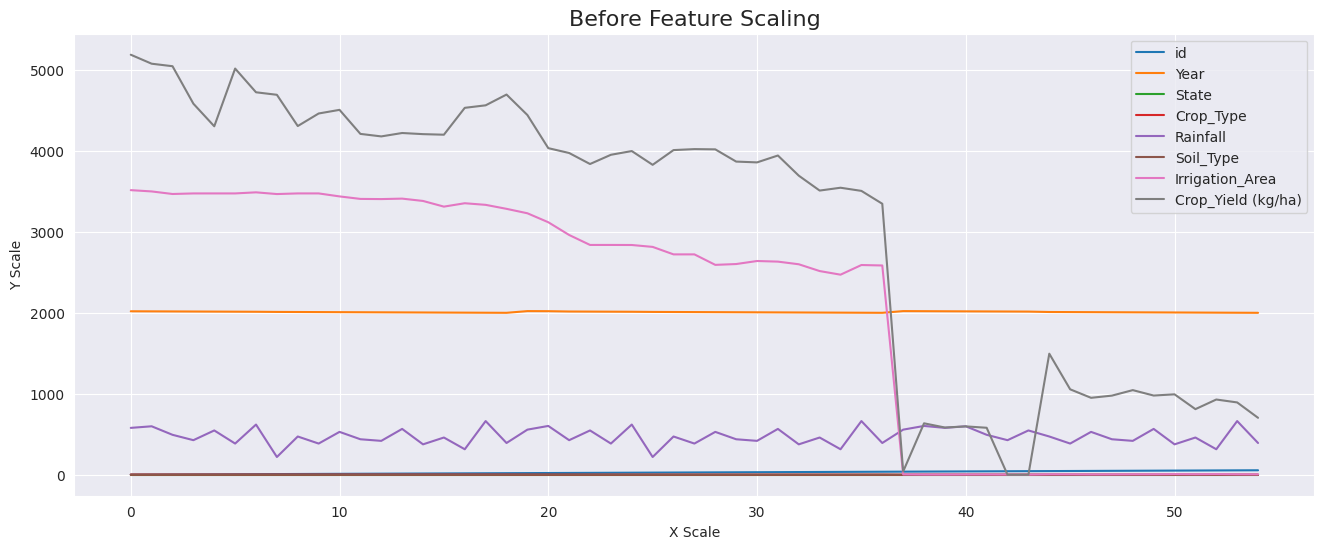

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

train_cp_df.plot(figsize=(16, 6))
plt.title("Before Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Here is the histogram view.

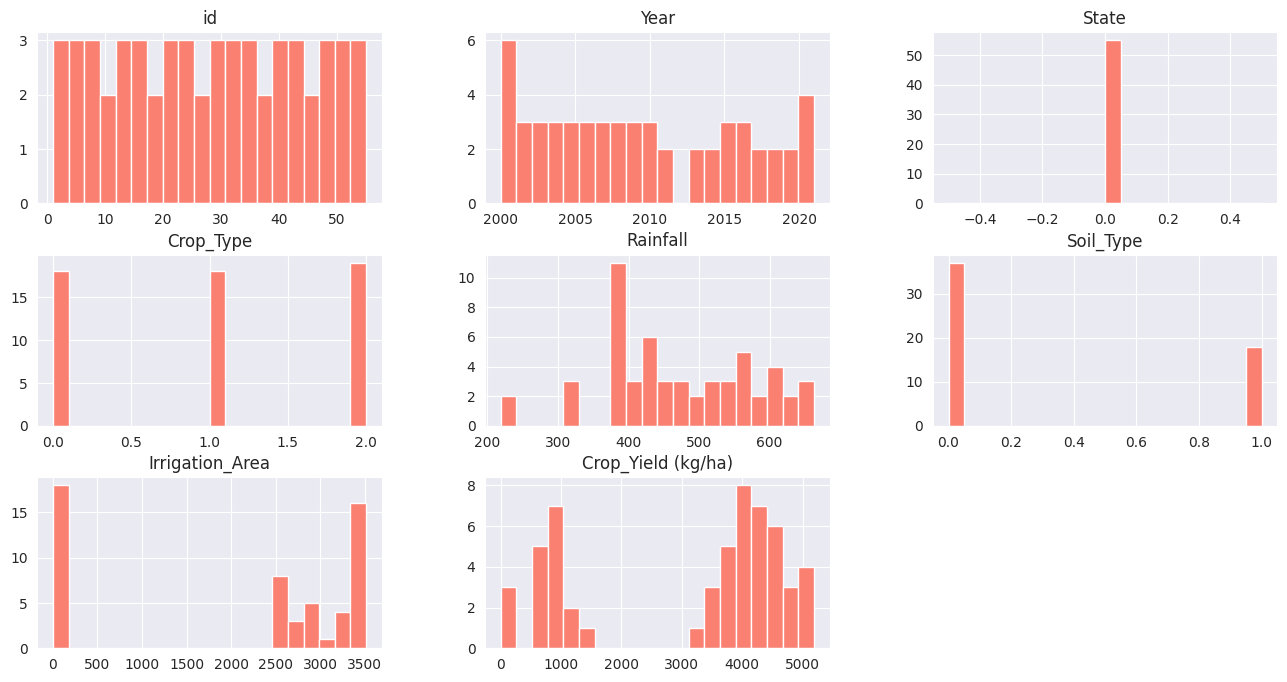

In [32]:
train_cp_df.hist(figsize=(16, 8), bins=20, color=["salmon"])
plt.show()

- Let's perform feature scaling on out `train_cp_df` dataset.
- We will be using Sklearn's preprocessing method named **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>**
- Formula to perform standard scaling is:<br> $z = (x - u) / s$
- where:
    - z is scaled data
    - x is to be scaled data
    - u is the mean of the training samples
    - s is the standard deviation of the training samples.
- There are also different scaling method provided by sklearn but StandardScaler perform the best.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

# we will apply feature scaling on train_cp_df dataset
train_cp_df = scaler.fit_transform(train_cp_df)

- after standard scaling our data will be no more in dataframe, it will be converted into numpy arrays.
- we will again use the pandas to convert it into dataframe.

In [35]:
type(train_cp_df)

numpy.ndarray

In [36]:
train_cp_df = pd.DataFrame(data=train_cp_df, columns=train_df.columns)
train_cp_df.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,-1.700840,1.495152,0.0,1.197342,0.989204,-0.697486,0.967235,1.246927
1,-1.637846,1.337315,0.0,1.197342,1.175297,-0.697486,0.956503,1.181286
2,-1.574852,1.179477,0.0,1.197342,0.180597,-0.697486,0.935173,1.162954
3,-1.511858,1.021640,0.0,1.197342,-0.445696,-0.697486,0.939831,0.889155
4,-1.448864,0.863802,0.0,1.197342,0.689755,-0.697486,0.939898,0.724166


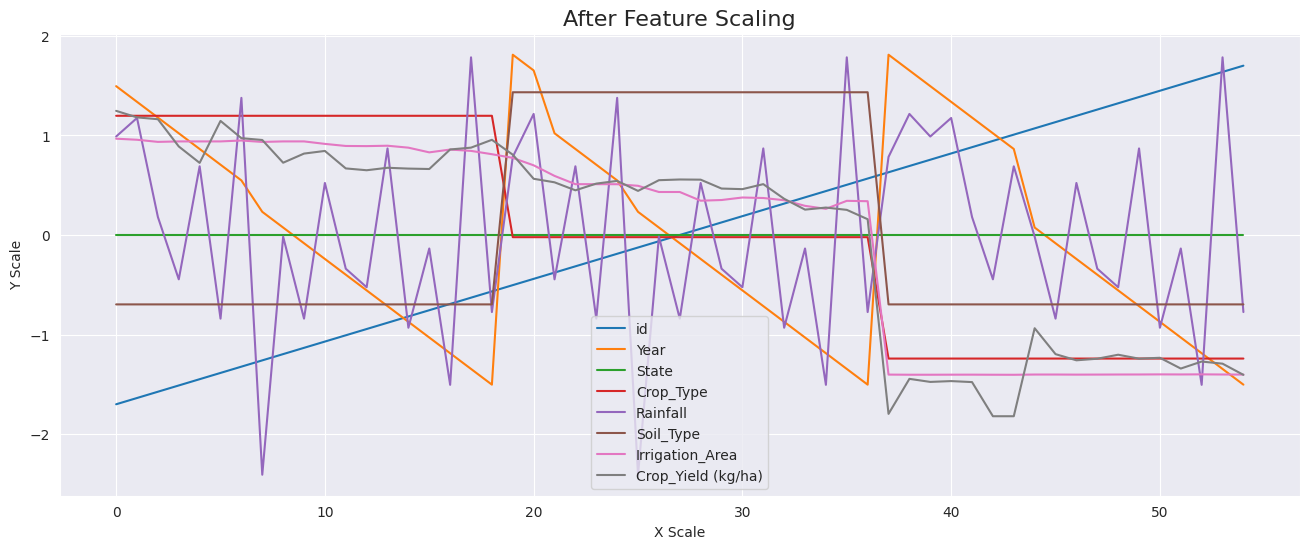

In [37]:
# plot after feature scaling
train_cp_df.plot(figsize=(16, 6))
plt.title("After Feature Scaling", fontsize=16)
plt.xlabel("X Scale")
plt.ylabel("Y Scale")

plt.show()

- Now it's better. Each feature had scaled between 2 to -2.
- here is the histogram view.

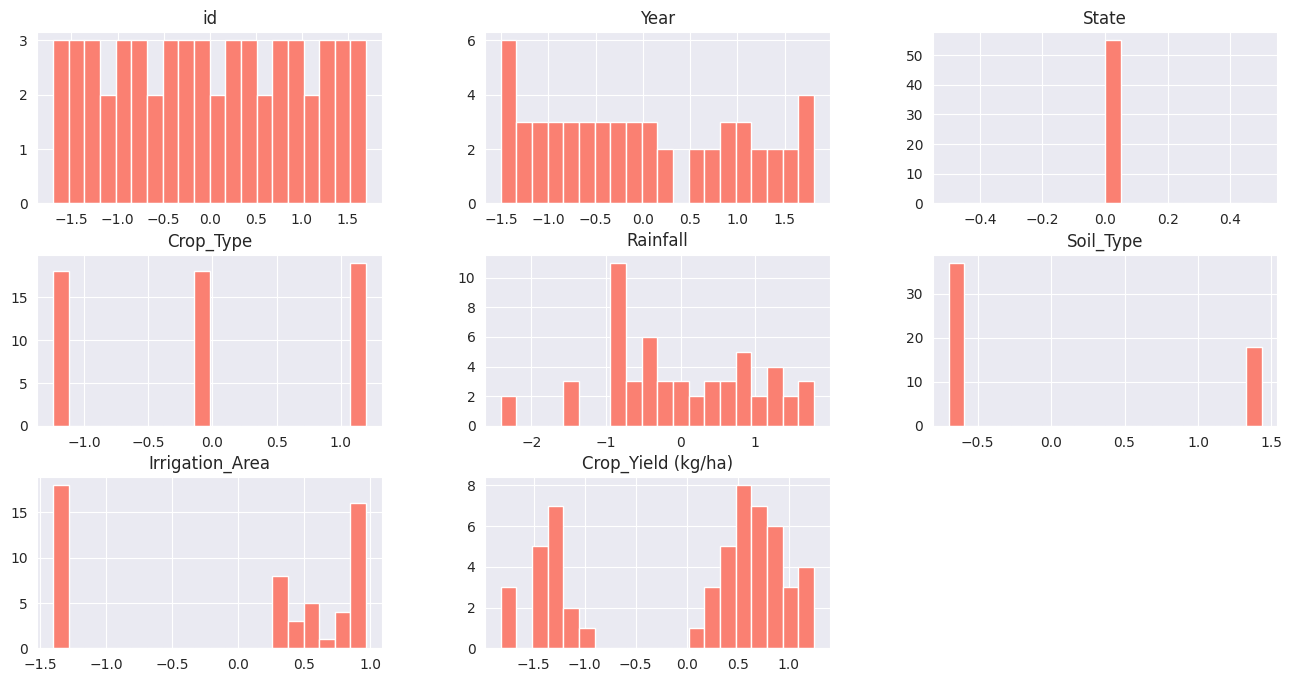

In [38]:
train_cp_df.hist(figsize=(16, 8), bins=20, color=["salmon"])
plt.show()

- Now we can easy extract the important features from dataset.

### Extracting Important Features 
- In this step we will select the best features so that our model will perform better.
- In first method of feature extraction we will be using C

In [ ]:
import pandas as pd

In [ ]:
import polars as pl

In [ ]:
data = pd.read_csv("/kaggle/input/innovative-ai-challenge-2024/train.csv")
data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load data using panadas
train_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/train.csv')
test_df = pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/test.csv')
submission_df= pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/sample_submission.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_data = train_df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train_df['Soil_Type']= label_encoder.fit_transform(train_df['Soil_Type']) 
train_df['Crop_Type']= label_encoder.fit_transform(train_df['Crop_Type']) 
train_df['State']= label_encoder.fit_transform(train_df['State']) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame and 'target_variable' is the column you want to predict
X = train_df.drop(["Crop_Yield (kg/ha)", "State", "id", "Year"], axis=1)
y = train_df["Crop_Yield (kg/ha)"]

# Applying RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))

In [ ]:
test_df

In [ ]:
train_df

In [ ]:
submission_df